In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vincent
import pickle
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize


In [6]:
#Data Source 1: The Occupational Employment Statistics (OES) program conducts a semi-annual mail survey
#designed to produce estimates of employment and wages for specific occupations. 
#The OES program collects data on wage and salary workers in nonfarm establishments in order 
#to produce employment and wage estimates for about 800 occupations. 
#URL to CSV File: https://catalog.data.gov/dataset/occupational-employment-statistics-employment-and-wages/resource/d61a4e2f-cf45-4074-97f6-19d7b64179ca
#Data Source 2: 
#https://www.oxfordmartin.ox.ac.uk/downloads/academic/The_Future_of_Employment.pdf

In [7]:
# df_states= pd.read_csv('state_M2016_dl.csv')
# df_employ_probs = pd.read_csv('The_Future_of_Employment_Table.csv')
# df_states_sum = pd.read_csv('state_2016_sum_totals.csv')
df_merged = pd.read_csv('merged_dataframe.csv')

In [8]:
df_merged.fillna(0, inplace = True)

In [9]:
#This is the fully merged dataframe containing over 37,500 counts of employed individuals in 702 occupations over 
# 50 states, each has a probabalistic coefficient representing how likely it is that this occipation will be automated
# or 'computerized in the future. These co-efficients funciton as a contextual scale of how difficult it is to automate 
# any one of these occupations. This table also includes a sum of how many individuals are employed in each occupation
# in the United States as a whole. 

#df_merged

In [10]:
# Core function to generate a coefficient for each state that represents how severely they will be impacted by 
# potential future automation. 
def state_coeff(state_name):
    for n in range(0, len(df_merged)):
        prob_coeff = 0
        prob_coeff += (df_merged['Probability'][(df_merged['Rank'] == n)] * (df_merged[state_name][(df_merged['Rank'] == n)])).sum()
        prob_coeff = prob_coeff/(df_merged[state_name].sum())
    return prob_coeff
#-Wesley

In [11]:
#Testing coefficient outputs of model for extreme states
prob_coeff = state_coeff('Alabama')
print(prob_coeff)
prob_coeff = state_coeff('New York')
print(prob_coeff)
prob_coeff = state_coeff('California')
print(prob_coeff)
#-Wesley

0.00535037026281
0.00319511234418
0.0030106283304


In [20]:
states = {'Alabama','Alaska','Arizona','Arkansas','California','Colorado',
         'Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho', 
         'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
         'Maine', 'Maryland','Massachusetts','Michigan','Minnesota',
         'Mississippi', 'Missouri','Montana','Nebraska','Nevada',
         'New Hampshire','New Jersey','New Mexico','New York',
         'North Carolina','North Dakota','Ohio',    
         'Oklahoma','Oregon','Pennsylvania','Rhode Island',
         'South Carolina','South Dakota','Tennessee','Texas','Utah',
         'Vermont','Virginia','Washington','West Virginia',
         'Wisconsin','Wyoming'}
coeffs = []
#-Wesley

In [21]:

for state in states:
    new_coeff = state_coeff(state)
    coeffs.append(new_coeff)
#-Wesley    

In [22]:
zipvars = zip(states, coeffs)
state_dictionary = dict(zipvars)
#-Wesley

In [23]:
state_dictionary

{'Alabama': 0.0053503702628139973,
 'Alaska': 0.0044370349571809633,
 'Arizona': 0.002588321217474013,
 'Arkansas': 0.0056123993348156723,
 'California': 0.0030106283303996512,
 'Colorado': 0.0031674637687710764,
 'Connecticut': 0.0034141249830554423,
 'Delaware': 0.0035917751367666477,
 'Florida': 0.0041430386946310826,
 'Georgia': 0.0033547857045049981,
 'Hawaii': 0.0035823463006432886,
 'Idaho': 0.004638010584882616,
 'Illinois': 0.003957064057593598,
 'Indiana': 0.0038883673104434906,
 'Iowa': 0.0060497375289597938,
 'Kansas': 0.0047214936981526089,
 'Kentucky': 0.0051366106973841277,
 'Louisiana': 0.005286531370670383,
 'Maine': 0.0045489854303631993,
 'Maryland': 0.0033568919915015392,
 'Massachusetts': 0.0032281481433212018,
 'Michigan': 0.0040553954403080598,
 'Minnesota': 0.00309151973131822,
 'Mississippi': 0.0046580638732499633,
 'Missouri': 0.0046805323642078386,
 'Montana': 0.0049013411630048024,
 'Nebraska': 0.0059572053817474472,
 'Nevada': 0.0032745737739423276,
 'New H

In [28]:
vincent.core.initialize_notebook()
bar = vincent.Bar(state_dictionary)
bar.axis_titles(x='States', y='Automation Risk')
bar.display()
# bar = vincent.Bar(state_dictionary)
#- Brody

In [29]:
df_state_dict = pd.DataFrame.from_dict(state_dictionary,orient='index')

/Users/WesleyPartridge/anaconda3/envs/python36/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/WesleyPartridge/anaconda3/envs/python36/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


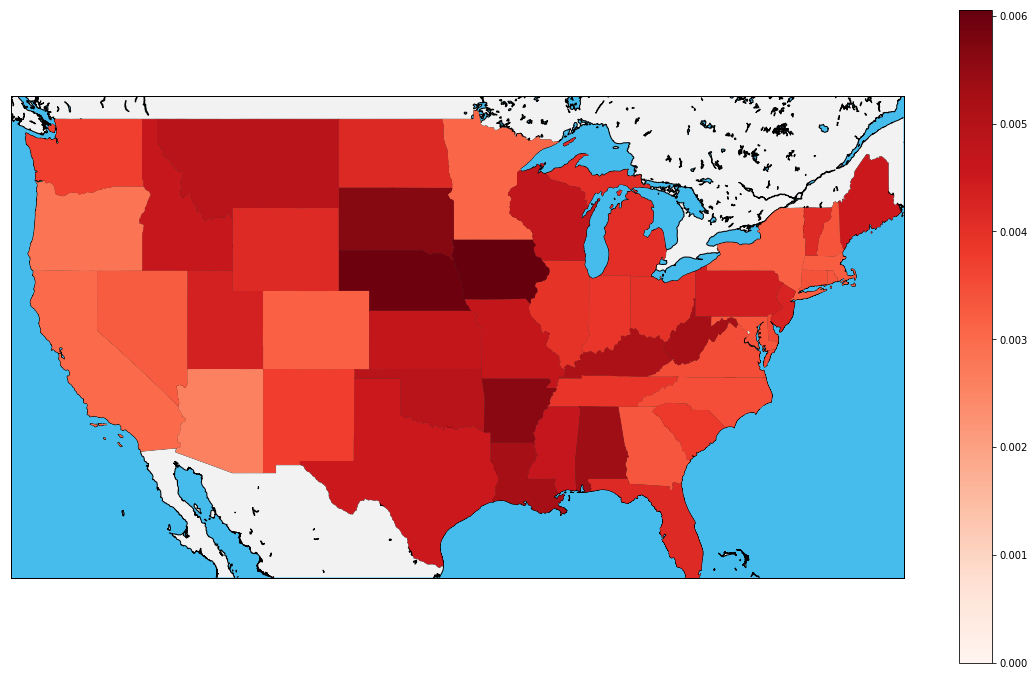

In [30]:
#Render new map using basemap extension of matplotlib, 
fig, ax = plt.subplots(figsize=(20,30))
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            #Trace new render frame using latitude and longitude
            llcrnrlon=-125.7, llcrnrlat= 25.26, urcrnrlon= -66.79, urcrnrlat= 50)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
#Draw map lines using government census border data shape file
m.readshapefile('./graphics/cb_2016_us_state_20m/cb_2016_us_state_20m' 
, 'states')
df_state_dict['area'] = df_state_dict.index
#Add employment coefficients for each state to dataframe containing shapes.
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.states],
        'area': [area['NAME'] for area in m.states_info],
        })
# Merge all dataframes for map render
df_poly = pd.merge(df_poly, df_state_dict, on = 'area', how = 'left')
df_poly.columns = ['area','shapes','coeffs']

#select color scheme for map render
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['coeffs'].fillna(0).values)))
ax.add_collection(pc)

mapper = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(df_poly['coeffs'])
plt.colorbar(mapper, shrink=0.4)
#-Wesley